<a href="https://colab.research.google.com/github/GiselyKCosta/Challenge_TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
dados_raw = pd.read_json(url)
dados = pd.DataFrame(dados_raw)
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
nomes_das_colunas = list(dados.columns)
print(nomes_das_colunas)

#Separar custumer
customer = dados['customer'].apply(pd.Series)
customer
dados_expanded = dados.drop(columns='customer').join(customer)
dados_expanded

#Separar phone
phone = dados['phone'].apply(pd.Series)
phone
dados_expanded = dados_expanded.drop(columns='phone').join(phone)
dados_expanded

#Separar internet
internet = dados['internet'].apply(pd.Series)
internet
dados_expanded = dados_expanded.drop(columns='internet').join(internet)
dados_expanded

#Separar account
account = dados['account'].apply(pd.Series)
account
dados_expanded = dados_expanded.drop(columns='account').join(account)
dados_expanded

#Separar Charges
charges = dados_expanded['Charges'].apply(pd.Series)
charges
dados_expanded = dados_expanded.drop(columns='Charges').join(charges)
dados_expanded

dados_expanded = dados_expanded.rename(columns={'Monthly': 'Charges_Monthly', 'Total': 'Charges_Total'})

nomes_das_colunas = list(dados_expanded.columns)
print(nomes_das_colunas)

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total']


In [ ]:
dados_reduzido = dados_expanded[[ 'Churn', 'gender', 'SeniorCitizen', 'tenure', 'PhoneService',  'InternetService',  'Contract','PaymentMethod','Charges_Monthly', 'Charges_Total']]
dados_reduzido

,Churn,gender,SeniorCitizen,tenure,PhoneService,InternetService,Contract,PaymentMethod,Charges_Monthly,Charges_Total
0,No,Female,0,9,Yes,DSL,One year,Mailed check,65.60,593.3
1,No,Male,0,9,Yes,DSL,Month-to-month,Mailed check,59.90,542.4
2,Yes,Male,0,4,Yes,Fiber optic,Month-to-month,Electronic check,73.90,280.85
3,Yes,Male,1,13,Yes,Fiber optic,Month-to-month,Electronic check,98.00,1237.85
4,Yes,Female,1,3,Yes,Fiber optic,Month-to-month,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,13,Yes,DSL,One year,Mailed check,55.15,742.9
7263,Yes,Male,0,22,Yes,Fiber optic,Month-to-month,Electronic check,85.10,1873.7
7264,No,Male,0,2,Yes,DSL,Month-to-month,Mailed check,50.30,92.75
7265,No,Male,0,67,Yes,DSL,Two year,Mailed check,67.85,4627.65


#🔧 Transformação

In [ ]:
for col in dados_reduzido.columns:
    print(f"Coluna: {col}")
    print(dados_reduzido[col].unique())
    print("-" * 30)


Coluna: Churn
['No' 'Yes' '']
------------------------------
Coluna: gender
['Female' 'Male']
------------------------------
Coluna: SeniorCitizen
[0 1]
------------------------------
Coluna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Coluna: PhoneService
['Yes' 'No']
------------------------------
Coluna: InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Coluna: Contract
['One year' 'Month-to-month' 'Two year']
------------------------------
Coluna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
------------------------------
Coluna: Charges_Monthly
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
------------------------------
Coluna: Charges_Total
['593.3' '542.4' '280.85' ... '742.9' '4627.65'

In [ ]:
dados_reduzido[[ 'Churn', 'gender', 'SeniorCitizen', 'tenure', 'PhoneService',  'InternetService',  'Contract', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total']].isna().sum()

dados_reduzido['Churn'] = dados_reduzido['Churn'].replace('', np.nan)
dados_reduzido = dados_reduzido.dropna(subset=['Churn'])

/tmp/ipython-input-160-729907631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_reduzido['Churn'] = dados_reduzido['Churn'].replace('', np.nan)


In [ ]:
for col in dados_reduzido.columns:
    print(f"Coluna: {col}")
    print(dados_reduzido[col].unique())
    print("-" * 30)

Coluna: Churn
['No' 'Yes']
------------------------------
Coluna: gender
['Female' 'Male']
------------------------------
Coluna: SeniorCitizen
[0 1]
------------------------------
Coluna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
------------------------------
Coluna: PhoneService
['Yes' 'No']
------------------------------
Coluna: InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Coluna: Contract
['One year' 'Month-to-month' 'Two year']
------------------------------
Coluna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
------------------------------
Coluna: Charges_Monthly
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
------------------------------
Coluna: Charges_Total
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3

In [ ]:
dados_reduzido['Charges_Total'].dtype

dados_reduzido['Charges_Total']= pd.to_numeric(dados_reduzido['Charges_Total'], errors='coerce')

/tmp/ipython-input-162-2540521523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_reduzido['Charges_Total']= pd.to_numeric(dados_reduzido['Charges_Total'], errors='coerce')


In [ ]:
dados_reduzido['Charges_Total'].dtype

dtype('float64')

In [ ]:
dados_reduzido['Contas_Diarias'] = dados_reduzido['Charges_Monthly'] / 30
dados_reduzido

/tmp/ipython-input-164-2082944591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_reduzido['Contas_Diarias'] = dados_reduzido['Charges_Monthly'] / 30


,Churn,gender,SeniorCitizen,tenure,PhoneService,InternetService,Contract,PaymentMethod,Charges_Monthly,Charges_Total,Contas_Diarias
0,No,Female,0,9,Yes,DSL,One year,Mailed check,65.60,593.30,2.186667
1,No,Male,0,9,Yes,DSL,Month-to-month,Mailed check,59.90,542.40,1.996667
2,Yes,Male,0,4,Yes,Fiber optic,Month-to-month,Electronic check,73.90,280.85,2.463333
3,Yes,Male,1,13,Yes,Fiber optic,Month-to-month,Electronic check,98.00,1237.85,3.266667
4,Yes,Female,1,3,Yes,Fiber optic,Month-to-month,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,13,Yes,DSL,One year,Mailed check,55.15,742.90,1.838333
7263,Yes,Male,0,22,Yes,Fiber optic,Month-to-month,Electronic check,85.10,1873.70,2.836667
7264,No,Male,0,2,Yes,DSL,Month-to-month,Mailed check,50.30,92.75,1.676667
7265,No,Male,0,67,Yes,DSL,Two year,Mailed check,67.85,4627.65,2.261667


#📊 Carga e análise

## Media geral

In [ ]:
tenure_media= dados_reduzido['tenure'].describe()
tenure_media


,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [ ]:
churn_media= dados_reduzido['Churn'].value_counts(normalize=True) * 100
churn_media

,proportion
Churn,
No,73.463013
Yes,26.536987


In [ ]:
churn_media_contract= dados_reduzido.groupby('Contract')['Churn'].value_counts(normalize=True) * 100
churn_media_contract

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.730482
                Yes      11.269518
Two year        No       97.168142
                Yes       2.831858
Name: proportion, dtype: float64

In [ ]:
churn_contract = {
    ('Month-to-month', 'No'): 57.29,
    ('Month-to-month', 'Yes'): 42.71,
    ('One year', 'No'): 88.73,
    ('One year', 'Yes'): 11.27,
    ('Two year', 'No'): 97.17,
    ('Two year', 'Yes'): 2.83
}

df = pd.Series(churn_contract).unstack()
df = df[['No', 'Yes']]

df.columns = ['Churn: Não', 'Churn: Sim']


cores = ['#2e2e3a', '#bc5d2e']


ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), color=cores)


for i, contrato in enumerate(df.index):
    nao = df.loc[contrato, 'Churn: Não']
    sim = df.loc[contrato, 'Churn: Sim']

    ax.text(i, nao / 2, f'{nao:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(i, nao + sim / 2, f'{sim:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')


plt.title('Proporção de Churn por Tipo de Contrato')
plt.ylabel('Proporção (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 100)
plt.legend(title='Situação de Churn')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

AttributeError: 'list' object has no attribute 'unstack'

In [ ]:
internet_media= dados_reduzido['InternetService'].value_counts(normalize=True) * 100
internet_media

,proportion
InternetService,
Fiber optic,43.958540
DSL,34.374556
No,21.666903


In [ ]:
payment_media= dados_reduzido. groupby('Churn')['PaymentMethod'].value_counts(normalize=True) * 100
payment_media

Churn  PaymentMethod            
No     Mailed check                 25.202938
       Electronic check             25.009664
       Credit card (automatic)      24.932354
       Bank transfer (automatic)    24.855044
Yes    Electronic check             57.303371
       Mailed check                 16.479401
       Bank transfer (automatic)    13.804173
       Credit card (automatic)      12.413055
Name: proportion, dtype: float64

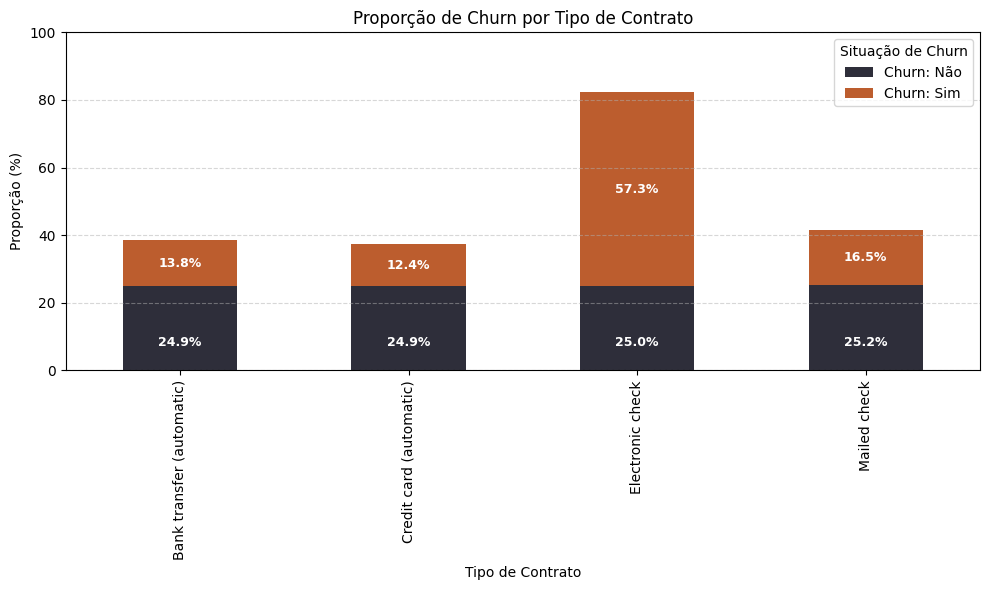

In [ ]:
df_payment = payment_media.unstack(level=0)


df_payment = df_payment[['No', 'Yes']]
df_payment.columns = ['Churn: Não', 'Churn: Sim']



cores = ['#2e2e3a', '#bc5d2e']


ax = df_payment.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)


for i, contrato in enumerate(df_payment .index):
    nao = df_payment .loc[contrato, 'Churn: Não']
    sim = df_payment .loc[contrato, 'Churn: Sim']

    if nao > 0:
        ax.text(i, nao / 3, f'{nao:.1f}%', ha='center', va='center', color='white', fontsize=9, fontweight='bold')

    if sim > 0:
        ax.text(i, nao + sim / 2, f'{sim:.1f}%', ha='center', va='center', color='white', fontsize=9, fontweight='bold')


plt.title('Proporção de Churn por Tipo de Contrato')
plt.ylabel('Proporção (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 100)
plt.legend(title='Situação de Churn')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Médias por gênero

In [ ]:
tenure_por_genero= dados_reduzido.groupby('gender' )['tenure'].describe()
tenure_por_genero



,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,3488.0,32.244553,24.463233,0.0,9.0,29.0,55.0,72.0
Male,3555.0,32.495359,24.656359,0.0,9.0,29.0,56.0,72.0


/tmp/ipython-input-218-1041719125.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])


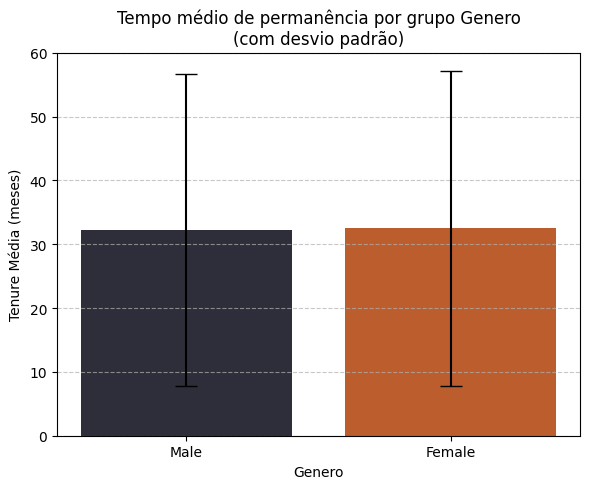

In [ ]:
means = tenure_por_genero['mean']
stds = tenure_por_genero['std']
groups = tenure_por_genero.index.astype(str)  # '0' e '1' como strings para legenda

fig, ax = plt.subplots(figsize=(6,5))

ax.bar(groups, means, yerr=stds, capsize=8, color=['#2e2e3a', '#bc5d2e'])

ax.set_xticklabels(['Male', 'Female'])
ax.set_ylabel('Tenure Média (meses)')
ax.set_xlabel('Genero')
ax.set_title('Tempo médio de permanência por grupo Genero\n(com desvio padrão)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
churn_por_genero= dados_reduzido.groupby('gender' )['Churn'].value_counts(normalize=True) * 100
churn_por_genero

gender  Churn
Female  No       73.079128
        Yes      26.920872
Male    No       73.839662
        Yes      26.160338
Name: proportion, dtype: float64

In [ ]:
contas_Diarias_por_genero= dados_reduzido.groupby('gender' )['Contas_Diarias'].describe()
contas_Diarias_por_genero

In [ ]:
charges_Total_por_genero= dados_reduzido.groupby('gender' )['Charges_Total'].describe()
charges_Total_por_genero

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,3483.0,2283.190985,2270.830254,18.85,402.875,1387.35,3819.8,8672.45
Male,3549.0,2283.407861,2263.100874,18.80,397.000,1404.65,3771.5,8684.80


## Medias Senior citizen

In [ ]:
tenure_por_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen' )['tenure'].describe()
tenure_por_SeniorCitizen

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,,,,,,,,
0,5901.0,32.192171,24.628639,0.0,9.0,28.0,55.0,72.0
1,1142.0,33.295972,24.188530,1.0,10.0,31.0,56.0,72.0


/tmp/ipython-input-214-1031951939.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não Idoso (0)', 'Idoso (1)'])


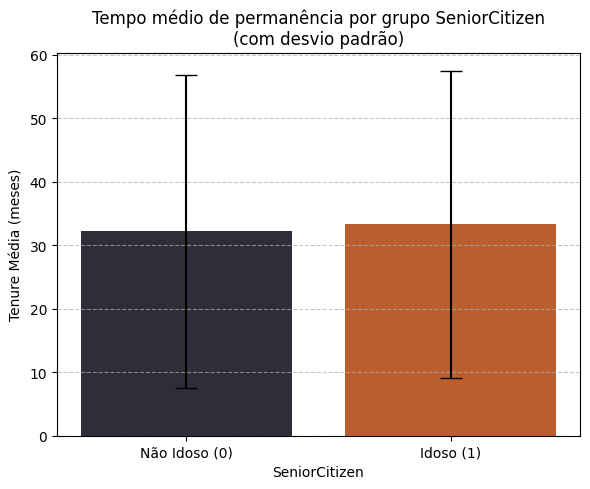

In [ ]:
means = tenure_por_SeniorCitizen['mean']
stds = tenure_por_SeniorCitizen['std']
groups = tenure_por_SeniorCitizen.index.astype(str)  # '0' e '1' como strings para legenda

fig, ax = plt.subplots(figsize=(6,5))

ax.bar(groups, means, yerr=stds, capsize=8, color=['#2e2e3a', '#bc5d2e'])

ax.set_xticklabels(['Não Idoso (0)', 'Idoso (1)'])
ax.set_ylabel('Tenure Média (meses)')
ax.set_xlabel('SeniorCitizen')
ax.set_title('Tempo médio de permanência por grupo SeniorCitizen\n(com desvio padrão)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
churn_por_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen' )['Churn'].value_counts(normalize=True) * 100
churn_por_SeniorCitizen

SeniorCitizen  Churn
0              No       76.393832
               Yes      23.606168
1              No       58.318739
               Yes      41.681261
Name: proportion, dtype: float64

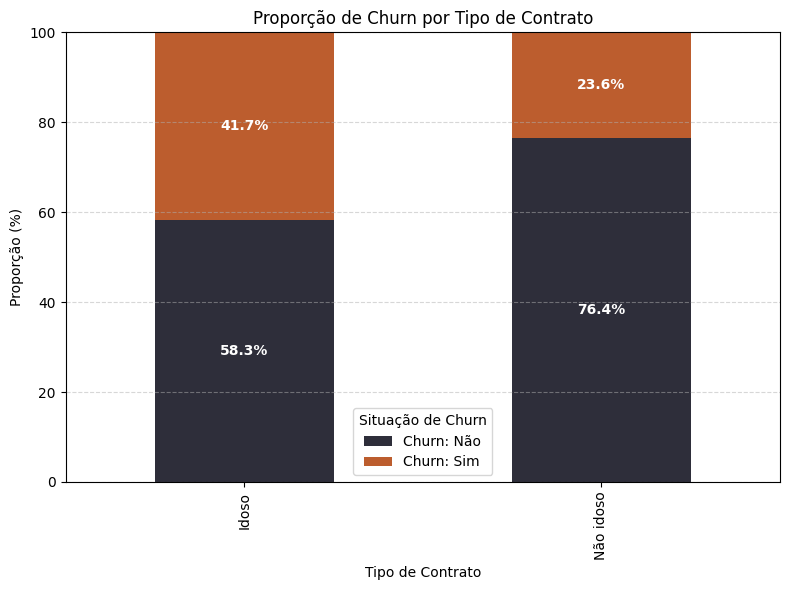

In [ ]:
senior_churn = {
    ("Não idoso", 'No'): 76.393832,
    ("Não idoso", 'Yes'): 23.606168,
    ("Idoso", 'No'): 58.318739,
    ("Idoso", 'Yes'): 41.681261
}

df = pd.Series(senior_churn).unstack()
df = df[['No', 'Yes']]

df.columns = ['Churn: Não', 'Churn: Sim']


cores = ['#2e2e3a', '#bc5d2e']


ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), color=cores)


for i, contrato in enumerate(df.index):
    nao = df.loc[contrato, 'Churn: Não']
    sim = df.loc[contrato, 'Churn: Sim']

    ax.text(i, nao / 2, f'{nao:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(i, nao + sim / 2, f'{sim:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')


plt.title('Proporção de Churn por Tipo de Contrato')
plt.ylabel('Proporção (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 100)
plt.legend(title='Situação de Churn')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
contas_Diarias_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen' )['Contas_Diarias'].describe()
contas_Diarias_SeniorCitizen

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,,,,,,,,
0,5901.0,2.061581,1.010535,0.608333,0.853333,2.193333,2.890000,3.958333
1,1142.0,2.660679,0.792134,0.631667,2.338333,2.828333,3.269167,3.915000


In [ ]:
charges_Total_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen' )['Charges_Total'].describe()
charges_Total_SeniorCitizen

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,,,,,,,,
0,5890.0,2181.089550,2233.217848,18.80,365.575,1295.775,3566.3625,8684.8
1,1142.0,2810.465193,2364.314180,19.45,689.575,2263.750,4600.3125,8443.7


In [ ]:
contract_por_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen')['Contract'].value_counts(normalize=True) * 100
contract_por_SeniorCitizen

SeniorCitizen  Contract      
0              Month-to-month    51.991188
               Two year          26.266734
               One year          21.742078
1              Month-to-month    70.665499
               One year          16.637478
               Two year          12.697023
Name: proportion, dtype: float64

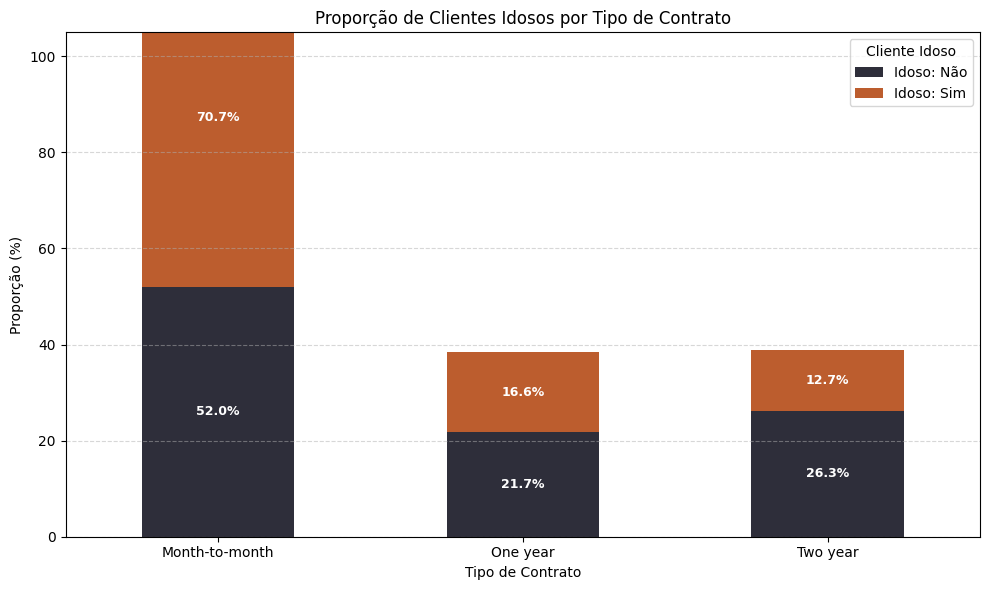

In [ ]:
df_senior_contract = contract_por_SeniorCitizen.unstack(level=0)

df_senior_contract.columns = ['Idoso: Não', 'Idoso: Sim']


cores = ['#2e2e3a', '#bc5d2e']


ax = df_senior_contract.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)


for i, contrato in enumerate(df_senior_contract.index):
    nao = df_senior_contract.loc[contrato, 'Idoso: Não']
    sim = df_senior_contract.loc[contrato, 'Idoso: Sim']


    pos_nao = nao / 2 if nao >= 5 else nao + 1
    ax.text(i, pos_nao, f'{nao:.1f}%', ha='center', va='center' if nao >= 5 else 'bottom',
            color='white' if nao >= 5 else 'black', fontsize=9, fontweight='bold')

    pos_sim = nao + sim / 2 if sim >= 5 else nao + sim + 1
    ax.text(i, pos_sim, f'{sim:.1f}%', ha='center', va='center' if sim >= 5 else 'bottom',
            color='white' if sim >= 5 else 'black', fontsize=9, fontweight='bold')

plt.title('Proporção de Clientes Idosos por Tipo de Contrato')
plt.ylabel('Proporção (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 105)
plt.xticks(rotation=0)
plt.legend(title='Cliente Idoso')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
internet_por_SeniorCitizen= dados_reduzido.groupby('SeniorCitizen')['InternetService'].value_counts(normalize=True) * 100
internet_por_SeniorCitizen

SeniorCitizen  InternetService
0              Fiber optic        38.383325
               DSL                36.637858
               No                 24.978817
1              Fiber optic        72.767075
               DSL                22.679510
               No                  4.553415
Name: proportion, dtype: float64

In [ ]:
payment_senior= dados_reduzido. groupby('SeniorCitizen')['PaymentMethod'].value_counts(normalize=True) * 100
payment_senior

SeniorCitizen  PaymentMethod            
0              Electronic check             30.011862
               Mailed check                 25.724453
               Bank transfer (automatic)    22.216573
               Credit card (automatic)      22.047111
1              Electronic check             52.014011
               Bank transfer (automatic)    20.402802
               Credit card (automatic)      19.352014
               Mailed check                  8.231173
Name: proportion, dtype: float64

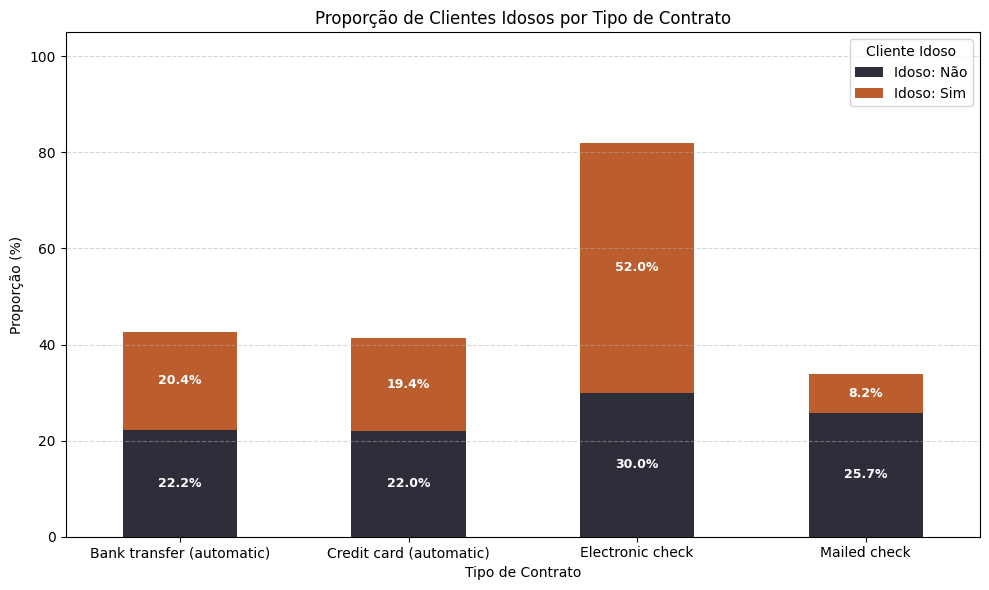

In [ ]:
df_senior_payment = payment_senior.unstack(level=0)

df_senior_payment.columns = ['Idoso: Não', 'Idoso: Sim']


cores = ['#2e2e3a', '#bc5d2e']


ax = df_senior_payment.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)


for i, contrato in enumerate(df_senior_payment.index):
    nao = df_senior_payment.loc[contrato, 'Idoso: Não']
    sim = df_senior_payment.loc[contrato, 'Idoso: Sim']


    pos_nao = nao / 2 if nao >= 5 else nao + 1
    ax.text(i, pos_nao, f'{nao:.1f}%', ha='center', va='center' if nao >= 5 else 'bottom',
            color='white' if nao >= 5 else 'black', fontsize=9, fontweight='bold')

    pos_sim = nao + sim / 2 if sim >= 5 else nao + sim + 1
    ax.text(i, pos_sim, f'{sim:.1f}%', ha='center', va='center' if sim >= 5 else 'bottom',
            color='white' if sim >= 5 else 'black', fontsize=9, fontweight='bold')

plt.title('Proporção de Clientes Idosos por Tipo de Contrato')
plt.ylabel('Proporção (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 105)
plt.xticks(rotation=0)
plt.legend(title='Cliente Idoso')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#📄Relatorio Final

# Relatório de Análise de Evasão de Clientes (Churn) - TelecomX

---

## 1. Introdução

### Objetivo da Análise

O objetivo principal desta análise é compreender os fatores que contribuem para a evasão de clientes (Churn) na empresa de telecomunicações **TelecomX**. Ao identificar padrões e características dos clientes que cancelam seus serviços, a TelecomX pode desenvolver estratégias mais eficazes para retenção.

### Problema de Evasão de Clientes (Churn)

Churn refere-se à taxa na qual os clientes cancelam ou descontinuam um serviço.
Compreender **por que** os clientes saem é o primeiro passo para desenvolver intervenções direcionadas e personalizadas que melhorem a satisfação e a lealdade do cliente.

---

## 2. Limpeza e Tratamento de Dados

 Os dados brutos foram obtidos a partir de um arquivo JSON hospedado no GitHub.

### Passos Realizados

- **Importação dos Dados:**  
  Dados importados diretamente de uma URL raw do GitHub utilizando `pd.read_json()`, carregando-os em um DataFrame do pandas.

- **Identificação e Separação de Colunas Aninhadas:**  
  Algumas colunas (`customer`, `phone`, `internet`, `account`) continham dados aninhados (dicionários ou listas representadas como strings), que precisaram ser expandidas em novas colunas.

- **Metodologia para Expansão:**  
  - Uso de `.apply(pd.Series)` para expandir as chaves do dicionário em colunas distintas.  
  - Concatenação do DataFrame expandido ao DataFrame principal.  
  - Remoção das colunas originais para evitar redundância.

- **Renomeação e Seleção de Colunas:**  
  As colunas `Monthly` e `Total` foram renomeadas para `Charges_Monthly` e `Charges_Total`, respectivamente. Foi selecionado um subconjunto de colunas relevantes, formando o `dados_reduzido`.

### Tratamento de Valores Ausentes e Tipos de Dados

- Na coluna `Churn`, valores em branco foram substituídos por `np.nan` e linhas com `NaN` foram removidas, pois `Churn` é a variável alvo.

- A coluna `Charges_Total` foi convertida de `object` para numérico (`float64`), com coerção de erros para `NaN`.

- Foi criada uma nova feature, `Contas_Diarias`, dividindo `Charges_Monthly` por 30.

---

## 3. Análise Exploratória de Dados (EDA)

A análise foi realizada para entender características dos clientes e identificar padrões relacionados ao churn.

### 3.1 Tempo de Permanência (Tenure) por Gênero

- Tempo médio similar entre mulheres (32,24 meses) e homens (32,49 meses), com desvios padrão próximos.  
- Sugere que o gênero não é um fator forte na duração do contrato.

### 3.2 Taxa de Churn por Gênero

| Gênero  | Não Churn (%) | Sim Churn (%) |
|---------|---------------|---------------|
| Mulheres| 73,08         | 26,92         |
| Homens  | 73,84         | 26,16         |

- Taxas bastante similares entre gêneros, reforçando que gênero não é um discriminador primário.

### 3.3 Tempo de Permanência por SeniorCitizen (Idosos)

- Idosos: 33,29 meses  
- Não idosos: 32,19 meses  
- Pequena diferença, indicando maior estabilidade dos clientes idosos.

### 3.4 Proporção de Churn por SeniorCitizen

- **Clientes idosos (SeniorCitizen=1):** 41,68% de churn  
- **Clientes não idosos (SeniorCitizen=0):** 23,61% de churn  

Indicando que idosos são um grupo de alto risco para evasão.

### 3.5 Proporção de Clientes Idosos por Tipo de Contrato

- **Idosos:** 70,67% em contratos "Month-to-month" (mês a mês).  
- **Não idosos:** Distribuição entre "Month-to-month" (51,99%), "One year" (21,74%) e "Two year" (26,27%).  

Contratos sem fidelidade predominam entre idosos, aumentando risco de churn.

### 3.6 Proporção de Clientes Idosos por Serviço de Internet

- 72,77% dos idosos utilizam "Fiber optic".  
- Não idosos dividem-se entre "Fiber optic" (38,38%), "DSL" (36,64%) e "No" (24,98%).  

Problemas no serviço ou custo do "Fiber optic" podem impactar o churn dos idosos.

### 3.7 Proporção de Clientes Idosos por Método de Pagamento

| Método           | Idosos (%) | Não Idosos (%) |
|------------------|------------|----------------|
| Electronic check | 52,01      | 30,01          |

- Uso elevado do "Electronic check" por idosos pode estar associado a maior churn devido a falta de automação ou falhas no processamento.

---

## 4. Conclusões e Insights

- **Gênero não é preditor significativo:** Permanência e churn semelhantes entre homens e mulheres.

- **SeniorCitizen é fator crítico:** Idosos têm taxa de churn significativamente maior (41,68%) que não idosos (23,61%).

- **Tipo de contrato importa:** Preferência por contratos mês a mês contribui para churn em idosos.

- **Internet Fiber optic pode ser ponto crítico:** Alta prevalência entre idosos pode afetar retenção se houver problemas.

- **Método de pagamento "Electronic check" é alerta:** Maior uso entre idosos pode gerar insatisfação e churn.

---

## 5. Recomendações

Para reduzir a evasão, especialmente entre clientes idosos:

- **Foco nos Clientes Idosos:**  
  Desenvolver programas específicos de retenção para o segmento SeniorCitizen.

- **Incentivar Contratos de Longo Prazo:**  
  - Oferecer descontos e benefícios para contratos de 1 ou 2 anos.  
  - Comunicar claramente vantagens e economia a longo prazo.

- **Otimizar Serviço Fiber Optic:**  
  - Pesquisas de satisfação focadas nos idosos.  
  - Garantir estabilidade e qualidade.  
  - Suporte técnico dedicado.

- **Promover Métodos de Pagamento Automáticos:**  
  - Incentivar migração do "Electronic check" para cartão de crédito ou débito automático.  
  - Oferecer incentivos financeiros e simplificar o processo.

- **Comunicação Eficiente:**  
  Utilizar canais preferenciais dos idosos (telefone, correspondência, apps simples) para suporte e promoções.

- **Programas de Fidelidade:**  
  Recompensar permanência, com atenção especial ao segmento idoso.

---

Ao focar nestes pontos, a TelecomX pode fortalecer a retenção e a lealdade dos seus clientes, especialmente no grupo de maior risco.

